<div style="font-size: 18px;">
Master in Computer Science <br>
Master in Data Science and Economics
</div>

<div style="font-size: 24px; margin-top: 2rem;">Algorithms for massive datasets</div>

<div style="font-size: 36px; margin-top: 5rem; margin-bottom: 3rem; text-align: center;">Mathematical preliminaries</div>

Prof. Dario Malchiodi

<div style="width: 50%; margin: auto;">
<img src="img/logo-di.jpg" style="height: 4rem; margin-top: 4.75rem; float: left;">
<img src="img/logo-demm.jpg" style="height: 3.5rem; margin-top: 5rem; margin-left: 0.5rem; margin-right: 0.5rem; float: left;">
<img src="img/logo-unimi.jpg" style="height: 3.5rem; margin-top: 5rem; float: left;">
</div>

In [37]:
%%html

<iframe src="https://directpoll.com/r?XDbzPBdIoNwJmL0DcpWlX8ofJyQ8xWyT2E1TrHiQqI" width="900" height="400">
</iframe>

# Multi-variable functions

<span class="newthought">Let</span> us focus on real-valued functions having two or more real arguments, that is functions having the form $f:\mathbb R^d \mapsto \mathbb R$, for an appropriate integer value $d \geq 2$. For sake of concision, we will occasionally refer to such mathematical objects as _multi-variable functions_ (a concept which is different from that of _multivariate_ functions, which will be introduced later on). Several concepts in the realm of unidimensional calculus can be extended to this kind of function, although  this extension often goes beyond the mere argument-wise application of known definitions and theorems. Consider, for instance, the concept of limit: within $\mathbb R$ we only have two ways of approaching to a limiting value, namely from the left and from the right; in $\mathbb R^d$, instead, we have _infinite_ possible directions approaching to a limiting point.

\begin{example}
The function $f:\mathbb R^2 \mapsto \mathbb R$ defined by $f(x, y) = \frac{xy}{x^2 + y^2}$ has a different limit when approaching $(0, 0)$ from a different linear path. Indeed, for such a fixed path corresponding to the direction $y = mx$ we have

\begin{equation*}
\lim_{(x, mx) \rightarrow (0, 0)} f(x, mx) =
\lim_{x \rightarrow 0} \frac{mx^2}{x^2 + m^2 x^2} = 
\frac{m}{1 + m^2},
\end{equation*}

that actually depends on $m$.
\end{example}

## Visualizing functions of two arguments

Let us start by the simplest possible case, that is functions $f: \mathbb R^2 \mapsto \mathbb R$. When appropriate regularity conditions (involving, for instance, continuity) are met, such functions can be easily visualized in graphical form, typically using

- a _3D plot_, using prospectical techniques in order to picture the tridimensional surface corresponding to the graph of $f$ onto a bidimensional plane, or
- a _contour plot_, showing a finite number of curves (aka _contours_), each describing the locus of points in the space corresponding to values of the arguments yielding a constant value for $f$, called _level_ of the associated contour.

Consider the function

\begin{equation*}
g(x, y) = \frac{7}{5} \mathrm e^{-\frac{(x-2)^2 + (y-8)^2}{5}} +
\mathrm e^{-\frac{(x-7)^2 + (y-5)^2}{10}}.
\end{equation*}

The following cell shows its 3D plot within $[-2, 12]^2$.

<IPython.core.display.Javascript object>


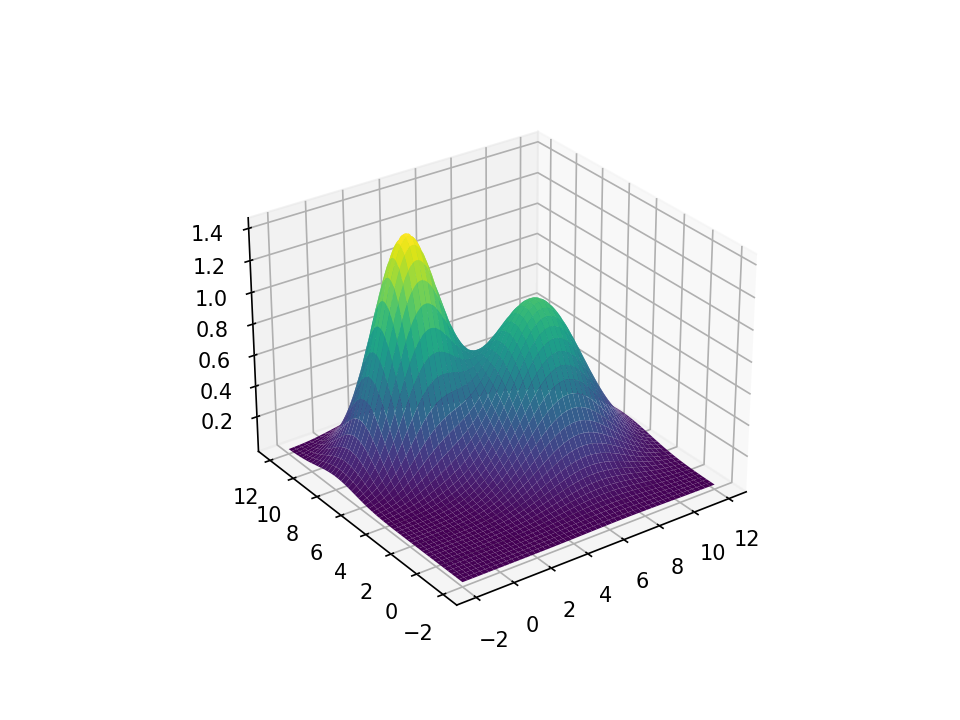

In [29]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
x_1d = np.linspace(-2.0, 12.0, 500)
y_1d = np.linspace(-2.0, 12.0, 500)
X, Y = np.meshgrid(x_1d, y_1d)

Z = 7/5 * np.exp(-.2 * ((X - 2)**2 + (Y - 8)**2)) + \
    np.exp(-.1*((X - 7)**2 + (Y - 5)**2))

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', shade=False)
    
plt.show()

From a technical point of view, producing this graph requires a non-immediate sequence of steps, some of which deviate from the standard process of creating and showing the graph of a function of one variable. Namely:

1. the `%matplotlib notebook` magic (line 1) allows a richer form of output which allows the interactive rotation of the 3D plot (using `%matplotlib inline` would produce a static output);
2. although `Axes3D` is never explicitly used, its importation (line 5) is mandatory, jointly with the `projection='3d'` argument in axis creation (line 8) in order to produce 3D plots;
3. separate samplings for the two arguments of the function (lines 10 and 11) are initially created;
4. the invokation of `np.meshgrid` (line 12) returns two bi-dimensional arrays that encode all the pairs of values from the one-dimensional samplings (see below for a more detailed explanation);
5. the objects `X` and `Y` obtained in previous points are combined in an analytical-like expression in order to obtain a sampling of the function to be shown (lines 14 and 15; note, however, that such objects are arrays, and as such they need to be processed — this is why it is necessary to use `np.exp` in order to compute exponentiation);
6. finally, `plot.surface` produces the 3D plot.

As specified in point 1., the obtained graphic is interactive, as shown by the palette of buttons in its lower-left part. However, most of the time the more efficace interaction is obtained through point-and-drag over the plot, which has the effect of rotating it.

As said before, understanding how `np.meshgrid` might require a deeper analysis. Basically, the samplings obtained for the single arguments should be further processed in order to obtain something analogous of their cartesian products, yet efficient in order to compute the function under study. This is done via
- stacking as many row-shaped copies of the first sampling as elements in the the second one, and
- juxtapposing as many column-shaped copies of the second sampling as elements in the first one.

The following cell invokes this function on two small list of values.

In [30]:
x_vals = [1, 2, 3]
y_vals = [10, 20]

X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
print(X_vals)
print(Y_vals)

[[1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]]


The two objects returned by `np.meshgrid` are numerical numpy arrays, so that their combination through arithmetic operators and numpy functions allow the efficient creation of a sampling of the overall function. Let's say that the latter computes the sum of its arguments: adding together `X_vals` and `Y_vals` will result in the desired sampling, as highlighted in the following cell.

In [17]:
X_vals + Y_vals

array([[11, 12, 13],
       [21, 22, 23]])

Despite its appeal, a 3D plot isn't most of the time the best option in order to plot a function of two arguments. This is due to the fact that perspective might hide interesting regions of the plot. Interactivity in the produced graph might be a solution, although in any case it is not possible to have an immediate view of the overall plotted function, and besides this option is not always pursuable (for instance, when producing printed or static documents). As previously pointed out, the alternative is that of producing a contour plot. This is easily done via matplotlib's `contour` function, whose inner working is based on the same concept of bidimensional sampling introduced for 3D plots.

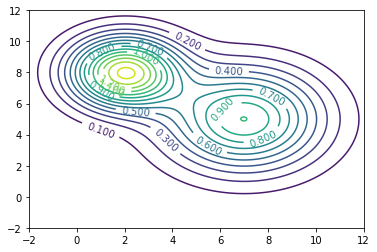

In [31]:
%matplotlib inline

cp = plt.contour(X, Y, Z, 15)
plt.clabel(cp)
   
plt.show()

Here, the fourth argument of `contour` specifies the number of contours, which are automatically chosen, and `clabel` labels each of them with their levels. A more sophisticated customization of the result is possible: for instance, it is possible to specify contours via a list of the corresponding levels, color them in a different way and show levels through a legend rather than via labels, or not display them at all.

The visualization of functions of more than two variables is possible and effective when the number of arguments is sufficiently low, and it exploits more complex techniques than the ones previously described. The former are out of the scope of this document.

## Derivatives of multi-variable functions

The concept of derivative extends straightforwardly to a multi-variable function $f$: the key idea is that of considering as fixed all but one of the arguments, say $x_k$, thus obtaining a function of one variable: the derivative of the former is called _partial derivative_ of $f$ w.r.t. $x_k$.

\begin{definition}[partial derivative]\label{def:partial-derivative}

Given a function $f:\mathbb R^n \mapsto \mathbb R$ of $n$ arguments, the _partial derivative_ of $f$ w.r.t. its $k$-th argument, denoted by $\frac{\partial f}{\partial x_k}$, is equal to the standard derivative of the function obtained by $f$ if all arguments except $x_k$ are considered as fixed, that is the function associating arguments $(x_1, \dots, x_k)$ to the value

\begin{equation*}
\frac{\partial f}{\partial x_k}(x_1, \dots, x_n) =
\lim_{h \rightarrow 0} \frac{f(x_1, \dots, x_{k-1}, x_k+h, x_{k+1}, \dots, x_n)-f(x_1, \dots, x_{k-1}, x_k, x_{k+1}, \dots, x_n)}{h}.
\end{equation*}

\end{definition}

Thus a function of $n$ variables can be associated to $n$ partial derivatives. Their organization in a vector gives rise to an object, called _gradient_, which we will extensively use in the course.

\begin{definition}[gradient]
The _gradient_ of a function $f: \mathbb R^n \mapsto \mathbb R$ is the $n$-dimensional vector

\begin{equation*}
\nabla f(x_1, \dots, x_n) = \left[
\frac{\partial f}{\partial x_1}(x_1, \dots, x_n),
\dots,
\frac{\partial f}{\partial x_n}(x_1, \dots, x_n),
\right]^\top.
\end{equation*}

\end{definition}


The gradient of a multi-variable function $f$ contains valuable information related to the optimization of $f$, as described in the following two facts.

\begin{property}
When the arguments $(x_1, \dots, x_n)$ are fixed, the value of the gradient of a function $f$ corresponds to the vector identifying the direction of steepest ascent for the graph of $f$, when starting from the point $p = (x_1, \dots, x_n)$.
\end{property}

This property of gradient, which we will use extensively in the forthcoming lectures, is easy to understand if one visualizes it for a one-dimensional function: if $f$ is increasing for a given argument, $f'$ will be positive on that same argument, thus interpreting its value as a shift will have the effect of moving towards the maximization of $f$. Vice versa for the case of a decreasing function.

Computing partial derivatives, and thus gradients, is easily done in python through the _sympy_ library, which adds to python some _symbolic computation_ abilities. Before showing the code, it is important to point out that the term _variable_ becomes somehow overloaded, because it can refer
- to a variable within one or several line of codes, or
- to a variable in a mathematical expression.

Thus we will keep the term _variable_ for the first case and we will speak of _symbols_ for the second one. In order to further enhance the difference, variables will be typeset as usual using a monospaced font (e.g., `x`), while symbols will be rendered as mathematical expressions (e.g., $x$). We are now ready to compute a gradient.

In [32]:
import sympy

x, y = sympy.symbols('x y')

z = 7/5 * sympy.exp( -.2 *((x - 2)**2 + (y - 8)**2)) + \
    sympy.exp(-.1*((x - 7)**2 + (y - 5)**2))

def gradient(expr, x_val, y_val):
    substitutions = [(x, x_val), (y, y_val)]
    return np.array([float(sympy.diff(expr, x).subs(substitutions)),
                     float(sympy.diff(expr, y).subs(substitutions))])

In the above cell:

- the variables `x`and `y` are bound to two _symbols_, called respectively $x$ and $y$ (line 3);
- these symbols are used in order to build an _expression_ (line 4), which in this case corresponds to the function $g$ which we previously visualized through a 3D and a contour plot;
- the function `sympy.diff` is used in order to compute the partial derivatives of this expression w.r.t. each of its variables, here introduced through the corresponding symbol (line 8-9), returning a new expression;
- the method `subs` performs a substitution on this expressions, replacing all occurrences of the symbols $x$ and $y$ with fixed numerical values, and converting the result (which is still an expression) as a float value.

The function `grad` put all these functionalities together in order to compute the gradient of a generic expression depending on $x$ and $y$ and evaluate it on given values for these symbols. Thus, for instance, we are able to compute the gradient of the considered function in $(0, 8)$: 

In [33]:
gradient(z, 1, 8)

array([ 0.47182002, -0.0066654 ])

and see that it approximately amounts to the vector $[ 0.472, -0.007 ]^\top$. We can now check that the gradient identifies the direction of maximal ascent: besides containing a better implementation of `grad`, the following cell generates an interactive graph containing the contour plot of the function $g$: clicking on any point $(x, y)$ will superpose the vector corresponding to $\nabla f(x, y)$ to the contours, showing that this vector always points towards the nearest local maximum of $g$.

<IPython.core.display.Javascript object>


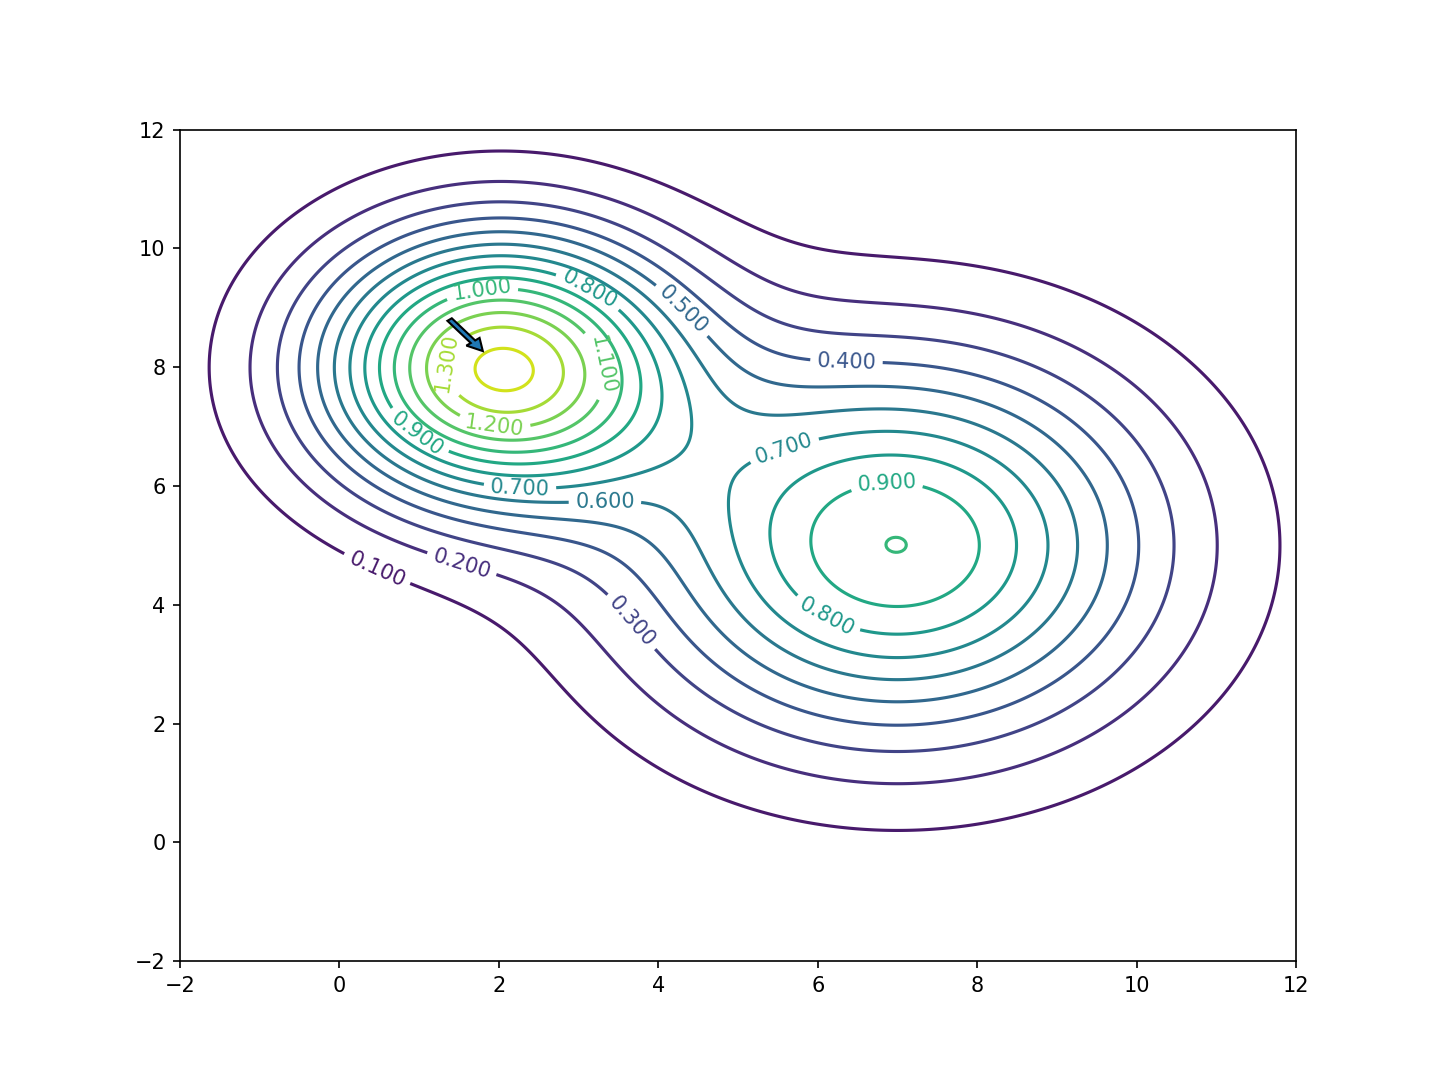

In [34]:
%matplotlib notebook

from IPython.display import clear_output

def gradient(expr, vars, vals):
    return np.array([float(sympy.diff(expr, var).subs(zip(vars, vals)))
                     for var in vars])

fig, ax = plt.subplots()

def onclick(event):

    ax.clear()
    
    cp = plt.contour(X, Y, Z, 15, zorder=0)
    plt.clabel(cp)
    
    if event is not None:
        grad = gradient(z, (x, y), (event.xdata, event.ydata))
        
        plt.arrow(event.xdata, event.ydata, grad[0], grad[1],
                  width=0.07, head_length=.2, zorder=1)
    

    clear_output(wait=True)
    display(ax.figure)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

onclick(None)
plt.show()

From a technical point of view, the production of this interactive graph requires some non-trivial knowledge of matplotlib; in particular:

- the `%matplotlib notebook` magic (line 1) will display figures using a special front end that allow interactivity of the produced graph;
- a matplotlib figure is created along with its axis, and their references are saved in `fig` and `ax`, respectively (line 9);
- the function `gradient` has been implemented in a clever way (lines 5-7), now allowing to compute derivatives of expression depending on any number of symbols;
- the function `onclick` is bound in line 29 to be called upon each click on the figure referenced by `fig`, with its argument `event` encoding information about the point where a click occurred;
- the same function is called in line 31 in order to produce the initial contour plot, passing `None` as argument in order to specify that no click occurred, and thus no gradient vector should be shown.

In turn the implementation of `onclick` is such that:

- the graph axis is cleared (line 13), deleting any previous content,
- the contour plot is produced as above (lines 15 and 16), specifying that it should be rendered as a background (cfr. the `zorder=0` argument),
- if the function has been called after a click, the `event` argument contains several informations, among which the variables `xdata` and `ydata` specify the coordinates of the clicked point, so that their values can be used in order to compute the gradient of $g$ (line 19) and to draw the corresponding arrow (lines 21-22) in the foreground of the figure (cfr. the `zorder=1` argument),
- in any case, the previous figure is discarded and the new one is displayed.

Note also that the value returned by `mpl_connect` should be saved in a variable, otherwise it would get garbage collected and the interactive part of the graph would not work. When interactivity is not needed anymore, it can be turned off by passing the saved value to `mpl_disconnect`, as follows.

In [35]:
fig.canvas.mpl_disconnect(cid)

In correspondence of local optima there is no ascending direction, thus we derive easily the following property.

\begin{property}
The gradient of a function nullifies in correspondence of its local optima.
\end{property}

We can experimentally verify this property by clicking in the previous interactive graph over points near to the two local maxima. Note that this is a necessary condition, but the gradient becomes zero also for other points, such as saddles.

Second-order derivatives naturally extend to multi-variable functions, taking into account that in this case each of the two derivation processes should be tied to its own variable.

\begin{definition}[second-order partial derivative] Let $f: \mathbb R^n \mapsto \mathbb R$ be a function, and fix two of its arguments, say $x_i$ and $x_j$. The _second-order partial derivative_ of $f$ w.r.t. $x_i$ and $x_j$ is the function

\begin{equation*}
\frac{\partial^2 f}{\partial x_i \partial x_j}(x_1, \dots, x_n) =
\frac{\partial \frac{\partial f}{\partial x_i}}{\partial x_j}(x_1, \dots, x_n).
\end{equation*}

\end{definition}

Note that a second-order derivative might involve either two different variables or a single variable upon which the function is derivated twice. These two cases are referred to speaking of _mixed_ and _pure_ derivative, respectively. In the latter case, the form $\partial^2 f/\partial x_i^2$ is generally preferred.

Computation of second-order derivatives via sympy simply requires to specify a further argument for `sympy.diff`, corresponding to the second variable of the derivation (thus repeating the variable in case of pure second-order derivatives, though a special syntax for this case can be used).

In [23]:
sympy.diff(z, x, y)

(0.2*x - 1.4)*(0.2*y - 1.0)*exp(-0.1*(x - 7)**2 - 0.1*(y - 5)**2) + (0.56*x - 1.12)*(0.4*y - 3.2)*exp(-0.2*(x - 2)**2 - 0.2*(y - 8)**2)

In [24]:
sympy.diff(z, x, x)

1.96*(0.142857142857143*x - 1)**2*exp(-0.1*(x - 7)**2 - 0.1*(y - 5)**2) + (0.4*x - 0.8)*(0.56*x - 1.12)*exp(-0.2*(x - 2)**2 - 0.2*(y - 8)**2) - 0.2*exp(-0.1*(x - 7)**2 - 0.1*(y - 5)**2) - 0.56*exp(-0.2*(x - 2)**2 - 0.2*(y - 8)**2)

Note also that _sympy_ expressions are rendered in a notebook using $\LaTeX$: this might help in discriminating them from the output of other kinds of expressions.

As in one-dimensional calculus, second-order derivatives can be used in order to search for local optima of a function. This is done analyzing two special structures built on these derivatives.

\begin{definition}[Hessian matrix]
The _Hessian matrix_ of a function $f: \mathbb R^n \mapsto \mathbb R$ is the $n \times n$ matrix

\begin{equation*}
\mathrm H_f(x_1, \dots, x_n) = \left[ \frac{\partial^2 f}{\partial x_i \partial x_j}(x_1, \dots, x_n) \right]_{n \times n}.
\end{equation*}

\end{definition}

\begin{definition}[Hessian]
The quantity

\begin{equation*}
\det \left( \mathrm H_f(x_1, \dots, x_n) \right),
\end{equation*}

that is, the determinant of the Hessian matrix of a function $f: \mathbb R^n \mapsto \mathbb R$, is called _Hessian_ of $f$.
\end{definition}

\begin{definition}[Laplacian]
The quantity

\begin{equation*}
\Delta f(x_1, \dots, x_n) = \sum_{i=1}^n \frac{\partial^2 f}{\partial x_i^2},
\end{equation*}

amounting to the trace of the Hessian matrix of a function $f: \mathbb R^n \mapsto \mathbb R$, is called _Laplacian_ of $f$.
\end{definition}

It is possible to show that, given a point $(x_1, \dots, x_n)$ such that $\nabla f(x_1, \dots, x_n) = 0$,

- if $\det \left( \mathrm H_f(x_1, \dots, x_n) \right) < 0$, $(x_1, \dots, x_n)$ is a saddle point for $f$;
- if $\det \left( \mathrm H_f(x_1, \dots, x_n) \right) > 0$ and $\Delta f(x_1, \dots, x_n) > 0$, $(x_1, \dots, x_n)$ is a (either local or global) minimum of $f$;
- if $\det \left( \mathrm H_f(x_1, \dots, x_n) \right) > 0$ and $\Delta f(x_1, \dots, x_n) < 0$, $(x_1, \dots, x_n)$ is a (either local or global) maximum of $f$.

Using _sympy_ it is rather easy to compute the Hessian and the Laplacian of a function in a given point.

In [25]:
def hessian(expr, x_val, y_val):
    hessian_matrix = sympy.Matrix([[sympy.diff(expr, v1, v2)
                                    for v1 in (x, y)]
                                    for v2 in (x, y)])
    return float(hessian_matrix.subs([(x, x_val), (y, y_val)]).det())

def laplacian(expr, x_val, y_val):
    l =[float(sympy.diff(expr, v, v).subs([(x, x_val), (y, y_val)]))
        for v in (x, y)]
                                 
    return sum(l)

If we consider for instance the point $(2, 8)$, which we know being a maximum of $g$, we see that the above listed rules work.

In [26]:
hessian(z, 2, 8) > 0 and laplacian(z, 2, 8) < 0

True

# Multivariate calculus

**Notation**

Matrices will be denoted as usual through capital letters, such as $A$; their definition will often follow the syntax $A = [a_{ij}]_{m \times n}$ in order to quickly show dimensions (the outer indices), as well as the symbol used in order to denote the matrix entries (together with the preferred running indices). The symbol $^\top$ will denote transposition, that is $A^\top$ is the matrix obtained by $A$ through exchanging rows and columns.

Vectors will be rendered using boldface letters, such as $\mathbf x$ or $\mathbf y$, and when otherwise stated they will be thought as _column_ vectors, using the transposition operator $^\top$ in order to explicitly describe a row-shaped vector.

## Basic operations on matrices

\begin{proposition}\label{prop:transpose-prod}

Let $A = [a_{ik}]_{m \times n}$ and $B = [b_{kj}]_{n \times p}$. If $C = A B$,
$C^\top = B^\top A^\top$.

\begin{proof}

Denote $c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}$, and let $D = C^\top$: now

\begin{equation*}
d_{ij} = c_{ji} = \sum_{k=1}^n a_{jk} b_{ki} = \sum_{k=1}^n b_{ki} a_{jk} =
\sum_{k=1}^n b^\top_{ik} a^\top_{kj},
\end{equation*}
Thus $C^\top = B^\top A^\top$.

\end{proof}

\end{proposition}

\begin{proposition}\label{prop:inverse-prod}


Let $A = [a_{ik}]_{n \times n}$ and $B = [b_{kj}]_{n \times n}$. If $C = A B$,
$C^{-1} = B^{-1} A^{-1}$.

\begin{proof}


by associativity we have

\begin{equation*}
C C^{-1} = A B B^{-1} A^{-1} =
A (B B^{-1}) A^{-1} = A I A^{-1} =
A A^{-1} = I.
\end{equation*}

Analogously,

\begin{equation*}
C^{-1} C = B^{-1} A^{-1} A B =
B^{-1} B = I.
\end{equation*}

\end{proof}


\end{proposition}

## Multivariate functions

Up to now, we focused on real-valued functions. We speak instead of _multivariate_ functions when the codomain is $\mathbb R^d$ for a suitable $d \in \mathbb N$. We will cover both the case of mono-variable, multivariate functions (that is, $f: \mathbb R \mapsto \mathbb R^d$ for $d \in \mathbb N$) and multi-variable, multivariate functions (that is, $f: \mathbb R^n \mapsto \mathbb R^d$ for $n, d \in \mathbb N$) by treating a function as a vector depending on one or more arguments. For sake of brevity, we will also omit the dependence of a function/vector on its arguments when the latter are clearly implied by the context.

## Derivatives of vectors and derivatives w.r.t. vectors

Let $\mathbf x(t) = [x_i(t)]_n$ denote a vector whose components depend on a quantity $t$. The derivative of $\mathbf x(t)$ w.r.t. $t$ is the vector

\begin{equation*}
\frac{\mathrm d \mathbf x(t)}{\mathrm d t} = \left[ \frac{\mathrm d x_i(t)}{\mathrm d t} \right]_n,
\end{equation*}

that is, the vector obtained by $\mathbf x(t)$ through element-wise computation of the derivative. An analogous derivative can be naturally extended to matrices.

\begin{definition}[Jacobian]\label{def:jacobian}

Let $f: \mathbb R^n \mapsto \mathbb R^m$, and given $\mathbf x = [x_j]_n$ and $\mathbf y = [y_i]_m$, let $\mathbf y = f(\mathbf x)$. The _Jacobian_ of $f$ is defined as the $m \times n$ matrix

\begin{equation*}
\mathrm J_f(\mathbf x) = \frac{\partial \mathbf y}{\partial \mathbf x} = \left[ \frac{\partial y_i}{\partial x_j} \right]_{m \times n}.
\end{equation*}

\end{definition}

\begin{example}

The Jacobian of $f(\mathbf x) = \sum_{i=1}^n x_i$ is the row vector

\begin{equation*}
\frac{\partial f(\mathbf x)}{\partial \mathbf x} =
\left[ \frac{\partial \sum_i x_i}{\partial x_j} \right]_n =
[1, \dots, 1] = \mathbf{1}^\top.
\end{equation*}

\end{example}

\begin{example}

The Jacobian of $f(x) = \begin{pmatrix} x \\ x^2 \end{pmatrix}$ is the column vector

\begin{equation*}
\frac{\partial f(x)}{\partial x} =
\left[ \frac{\partial f(x)_i}{\partial x} \right]_2 =
\begin{pmatrix} 1 \\ 2x \end{pmatrix}.
\end{equation*}

\end{example}

\begin{example}

Consider the function $f(x_1, \dots, x_n) = ( x_1, \dots, x_n )^\top$: as $\frac{\partial f(x_1, \dots, x_n)_i}{\partial x_j} = \delta_{ij}$, where $\delta_{ij}$ denotes the Kronäker delta, the Jacobian of $f$ is the $n$-dimensional identity matrix.

\end{example}

\begin{proposition}\label{prop:jacobian-Ax}

Let $A = [a_{ij}]_{m \times n}$ denote a matrix whose elements are independent of $\mathbf x = [x_j]_n$. If $\mathbf y = A \mathbf x$,

\begin{equation*}
\frac{\partial \mathbf y}{\partial \mathbf x} = A.
\end{equation*}

\begin{proof}
We have

\begin{equation*}
y_i = \sum_{k=1}^n a_{ik}x_k,
\end{equation*}

thus

\begin{equation*}
\frac{\partial y_i}{\partial x_j} = a_{ij},
\end{equation*}

which obviously imply that the Jacobian of $A \mathbf x$ is $A$.

\end{proof}


\end{proposition}

\begin{proposition}

Let $A = [a_{ij}]_{m \times n}$ denote a matrix whose elements are independent of $\mathbf x = [x_j]_n$. If $\mathbf y = A \mathbf x$ and $\mathbf x$ is dependent on another vector $\mathbf z$,

\begin{equation*}
\frac{\partial \mathbf y}{\partial \mathbf z} =
\frac{\partial}{\partial \mathbf z} A\mathbf x=
A \frac{\partial \mathbf x}{\partial \mathbf z}.
\end{equation*}

\begin{proof}

We have $y_i = \sum_{k=1}^n a_{ik} x_k$, and being $A$ independent of $\mathbf z$ (otherwise it would depend on $\mathbf x$), the $i,j$ element of the Jacobian $\frac{\partial \mathbf y}{\partial \mathbf z}$ is

\begin{equation*}
\frac{\partial y_i}{\partial z_j} =
\frac{\partial}{\partial z_j} \sum_{k=1}^n a_{ik} x_k =
\sum_{k=1}^n a_{ik} \frac{\partial x_k}{\partial z_j}.
\end{equation*}

On the other hand, the $i,j$ element of $A \frac{\partial \mathbf x}{\partial \mathbf z}$ is

\begin{equation*}
\sum_{k=1}^n a_{ik} \frac{\partial x_k}{\partial z_j},
\end{equation*}

which implies $\frac{\partial \mathbf y}{\partial \mathbf z} =
A \frac{\partial \mathbf x}{\partial \mathbf z}$.

\end{proof}

\end{proposition}

\begin{proposition}

If $A = [a_{ij}]_{m \times n}$ denote a matrix whose elements are independent of two vectors $\mathbf x$ and $\mathbf y$ whose dimensions are compatible with the product $\alpha = \mathbf y^\top A \mathbf x$, we have

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf x} =
\frac{\partial}{\partial \mathbf x} \mathbf y^\top A \mathbf x =
\mathbf y^\top A,
\end{equation*}

and analogously

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf y} =
\mathbf x^\top A^\top.
\end{equation*}

\begin{proof}

Let $\mathbf w^\top = \mathbf y^\top A$, so that $\alpha = \mathbf w \mathbf x$; by Proposition 3, since $\mathbf w$ does not depend on $\mathbf x$, we have

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf x} = \mathbf w = \mathbf y^\top A.
\end{equation*}

On the other hand, being $\alpha$ a scalar we also have $\alpha = \alpha^\top = \mathbf x^\top A^\top \mathbf y$ by Proposition \ref{prop:transpose-prod}, thus

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf y} =
\frac{\partial}{\partial \mathbf y} \mathbf x^\top A^\top \mathbf y =
\mathbf x^\top A^\top,
\end{equation*}

also in this case according to Proposition \ref{prop:jacobian-Ax}, as $\mathbf x^\top A^\top$ does not depend on $\mathbf y$.

\end{proof}


\end{proposition}

\begin{proposition}\label{prop:jacobian-xAx}

If $A = [a_{ij}]_{n \times n}$ denote a matrix whose elements are independent of the vector $\mathbf x$ whose dimensions are compatible with the product $\alpha = \mathbf x^\top A \mathbf x$, we have

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf x} = \mathbf x^\top \left( A + A^\top \right).
\end{equation*}

\begin{proof}

we have $\alpha = \sum_{i=1}^n \sum_{j=1}^n x_i a_{ij} x_j$, thus

\begin{eqnarray*}
\frac{\partial \alpha}{\partial x_k} & = &
\sum_{i=1}^n \sum_{j=1}^n a_{ij} \frac{\partial}{\partial x_k} x_i x_j = \\
& & \sum_{i=1}^n \sum_{j=1}^n a_{ij} \left(x_i \frac{\partial x_j}{\partial x_k} + x_j \frac{\partial x_i}{\partial x_k} \right) = \\
& & \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i \frac{\partial x_j}{\partial x_k} +
\sum_{j=1}^n \sum_{i=1}^n a_{ij} x_j \frac{\partial x_i}{\partial x_k} = \\
& & \sum_{i=1}^n a_{ik} x_i + \sum_{j=1}^n a_{kj} x_j = \\
& & \sum_{i=1}^n a_{ki}^\top x_i + \sum_{j=1}^n a_{kj} x_j \\
& & (A^\top \mathbf x)_k + (A \mathbf x)_k.
\end{eqnarray*}

Noting that $\frac{\partial \alpha}{\partial \mathbf x}$ is a row vector (having precisely one row and $n$ columns), thus

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf x} =
(A^\top \mathbf x + A \mathbf x)^\top =
\mathbf x^\top A + \mathbf x^\top A^\top = \mathbf x^\top (A + A^\top)
= \mathbf x^\top (A^\top + A).
\end{equation*}

\end{proof}


\end{proposition}

\begin{proposition}

Under the same hypotheses of Proposition \ref{prop:jacobian-xAx}, if $A$ is a symmetric matrix

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf x} = 2 \mathbf x^\top A.
\end{equation*}

\begin{proof}

According to Proposition \ref{prop:jacobian-xAx}, and exploiting the fact that $A^\top = A$
by symmetry,

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf x} = \mathbf x^\top (A^\top + A) = 2 \mathbf x^\top A.
\end{equation*}

\end{proof}

\end{proposition}

\begin{proposition}

Given two vectors $\mathbf x = [x_i]_n$ and $\mathbf y = [y_i]_n$, both dependent
on another vector $\mathbf z$, and defined $\alpha = \mathbf y^\top \mathbf x$,

\begin{equation*}
\frac{\partial \alpha}{\partial \mathbf z} =
\mathbf x^\top \frac{\partial \mathbf y}{\partial \mathbf z} +
\mathbf y^\top \frac{\partial \mathbf x}{\partial \mathbf z}
\end{equation*}


\begin{proof}

By definition $\alpha = \sum_{i=1}^n x_i y_i$, thus for each $k$

\begin{equation*}
\frac{\partial \alpha}{\partial z_k} =
\sum_{i=1}^n \left( x_i \frac{\partial y_i}{\partial z_k} +
y_i \frac{\partial x_i}{\partial z_k} \right) =
\sum_{i=1}^n x_i \frac{\partial y_i}{\partial z_k} +
\sum_{i=1}^n y_i \frac{\partial x_i}{\partial z_k} =
\mathbf x^\top \frac{\partial \mathbf y}{\partial z_k} +
\mathbf y^\top \frac{\partial \mathbf x}{\partial z_k}.
\end{equation*}

Therefore $\frac{\partial \alpha}{\partial \mathbf z} =
\mathbf x^\top \frac{\partial \mathbf y}{\partial \mathbf z} +
\mathbf y^\top \frac{\partial \mathbf x}{\partial \mathbf z}$.
\end{proof}

\end{proposition}


## Multi-variable integrals

The concept of integration _à la_ Riemann naturally extends to functions having the form $f: \mathbb R^n \mapsto \mathbb R$. Indeed, we can consider the _volume_ of the multidimensional region in $\mathbb R^{n+1}$ lying between the graph of $f$ and the hyperplane $x_{n+1} = 0$.

Such multi-variable integrals are denoted using several integration symbols, one per involved variable. When integration is done over a hyper-rectangle, the extremes of each dimension is shown in the lower and upper part of each integral sign, as usual, otherwise the integration region is specified under the sequence of integral signs.

The most simple kind of multi-variable integration occurs when $f$ is _separable_, that is it can be expressed as the product of $n$ factors, each depending only on one of the considered variables. In this case, the overall process boils down to the product of $n$ standard integrals.

In more complex cases, such as the one which will study in the section on multivariate normal distributions, a variable substitution is often used, e.g. in order to reformulate integration using polar coordinates.

More formally, let $\varphi: \mathbb R^n \mapsto \mathbb R^n$ denote the transformation to be applied, and denote with $x_1, \dots, x_n$ the original variables and with $u_1, \dots, u_n$ the transformed ones (that is, $\varphi(x_1, \dots, x_n) = (u_1, \dots, u_n)^\top$). If $\varphi$ is injective and continuously differentiable, it can be shown that

\begin{equation*}
\mathrm d x_1 \dots \mathrm d x_n =
| \det( \mathrm J_\varphi ) | \mathrm d u_1 \dots \mathrm d u_n
\end{equation*}

Therefore, denoting by $g(u_1, \dots, u_n)$ the equivalent of $f(x_1, \dots, x_n)$ after the application of $\varphi$, we have

\begin{equation*}
\int \dots \int f(x_1, \dots, x_n) \mathrm d x_1 \dots \mathrm d x_n =
\int \dots \int g(u_1, \dots, u_n) 
| \det(\mathrm J_\varphi) | \mathrm d u_1 \dots \mathrm d u_n.
\end{equation*}

\begin{example}\label{example:polar-coords}
Consider the integral

\begin{equation*}
I = \iint_ {x^2 + y^2 \leq 1} \mathrm d x \mathrm d y,
\end{equation*}

amounting to the area of the unit circle centered on the origin, which we know to be equal to $\pi$. As the transformation between the Euclidean coordinates $(x, y)$ in $\mathbb R^2$ and the related polar coordinates $(\rho, \theta)$ is

\begin{equation*}
\varphi \begin{pmatrix} x \\ y \end{pmatrix} =
\begin{pmatrix} \rho \cos \theta \\ \rho \sin \theta \end{pmatrix},
\end{equation*}

we have

\begin{equation*}
\mathrm J_\varphi = \begin{pmatrix}
\cos \theta & -\rho \sin \theta \\
\sin \theta & \rho \cos \theta
\end{pmatrix}
\end{equation*}

and thus $\det(\mathrm J_\varphi) = \rho \cos^2 \theta + \rho \sin^2 \theta = \rho$. Being furthermore $\rho > 0$, the original integral can be easily reformulated in separable form as

\begin{equation*}
I = \int_0^1 \int_0^{2\pi} \rho \mathrm d \rho \mathrm d \theta =
\int_0^1 \rho \mathrm d \rho \int_0^{2\pi} \mathrm d \theta =
\frac{1}{2} 2 \pi = \pi.
\end{equation*}

\end{example}


# The multivariate normal distribution

Consider a random vector $\mathbf X$, whose components $X_1$ and $X_2$ follow two independent normal distributions, both having expected value and standard deviation equal to $\mu$ and $\sigma$, respectively. By independence,

\begin{equation*}
f_\mathbf x(\mathbf x) = f_{X_1, X_2}(x_1, x_2) = f_{X_1}(x_1) f_{X_2}(x_2) =
\frac{1}{2\pi \sigma^2} \mathrm e^{-\frac{(x_1 - \mu)^2 + (x_2 - \mu)^2}{2 \sigma^2}}.
\end{equation*}

Moreover, showing that $f_{X_1, X_2}$ is a probability density is actually easier than showing that $f_{X_1}$ is. Indeed,

\begin{equation*}
\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}
f_{X_1, X_2}(x_1, x_2) = \frac{1}{2\pi}
\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} \frac{1}{\sigma^2}
\mathrm e^{-\frac{1}{2}\left(\frac{x_1-\mu}{\sigma} \right)^2}
\mathrm e^{-\frac{1}{2}\left(\frac{x_2-\mu}{\sigma} \right)^2} \mathrm d x_1 \mathrm d x_2,
\end{equation*}

and after application of the linear transformation

\begin{equation*}
t \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} =
\begin{pmatrix} \mu + x_1 \sigma \\ \mu + x_2 \sigma \end{pmatrix} =:
\begin{pmatrix} z \\ w \end{pmatrix}
\end{equation*}

and recalling that $\mathrm{det}(\mathrm J_t) = \sigma^2 $, we have

\begin{equation*}
\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}
f_{X_1, X_2}(x_1, x_2) = \frac{1}{2\pi}
\int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty}
\mathrm e^{-\frac{z^2 + w^2}{2}} \mathrm d z \mathrm d w.
\end{equation*}

Switching to polar coordinates $(\rho, \theta)$, and recalling Example \ref{polar-coords, the latter integral becomes

\begin{equation*}
\frac{1}{2\pi} \int_0^{2\pi} \int_0^{+\infty}\rho \mathrm e^{-\frac{\rho^2}{2}}
\mathrm d \rho \mathrm d \theta.
\end{equation*}

After separation, the integral on $\theta$ obviously amounts to $2\pi$, while the one on $\rho$ is equal to

\begin{equation*}
\int_0^{+\infty} \rho \mathrm e^{-\frac{\rho^2}{2}} \mathrm d \rho =
\int_0^{+\infty} \mathrm e^{-q} \mathrm dq = \left. - \mathrm e^{-q} \right|_0^{+\infty} = 1, 
\end{equation*}

thus the overall original integral is 1. Note, however, that we would get an analogous result even for the more general version of the joint density

\begin{equation*}
f_\mathbf x(\mathbf x) = f_{X_1, X_2}(x_1, x_2) = f_{X_1}(x_1) f_{X_2}(x_2) =
\frac{1}{2\pi \sigma_1 \sigma_2} \mathrm e^{-\left( \frac{(x_1-\mu_1)^2}{2\sigma_1^2} + \frac{(x_2 - \mu_2)^2}{2 \sigma_2^2} \right)},
\end{equation*}

where now the components of $\mathbf X$ are distributed according to two different normal distributions: indeed, the only difference in the above proof would consist in a slightly different formulation of the first transformation $t$. The following cell shows the contour plot of such a density, where the fact that contours correspond to ellipses whose axes are directed as the reference system is a direct consequence of the independence between the components of $\mathbf X$.

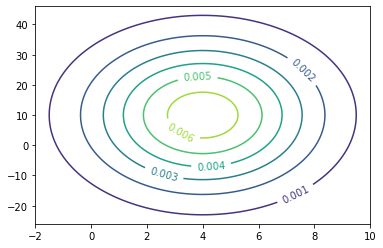

In [27]:
%matplotlib inline

mu_1, mu_2 = 4, 10
sigma_1, sigma_2 = 2, 12

x_1 = np.linspace(mu_1 - 3*sigma_1, mu_1 + 3*sigma_1, 100)
x_2 = np.linspace(mu_2 - 3*sigma_2, mu_2 + 3*sigma_2, 100)
X_1, X_2 = np.meshgrid(x_1, x_2)

Z = 1/(2 * np.pi * sigma_1 * sigma_2) * \
    np.exp(-(((X_1-mu_1)/(2*sigma_1))**2 + ((X_2-mu_2)/(2*sigma_2))**2))

cp = plt.contour(X_1, X_2, Z)
plt.clabel(cp)
   
plt.show()

Rewrting the joint density in vectorial form will help us in order to generalize the concept of multivariate normal distribution to a higher number of dimensions. First of all, if we introduce the expected value vector $\mathbf m = (\mu_1, \mu_2)^\top$ and the variance matrix

\begin{equation*}
\Sigma = 
\begin{pmatrix}
\sigma_1^2 & 0 \\
0 & \sigma_2^2
\end{pmatrix}
\end{equation*}

the joint density can be written as

\begin{equation*}
f_\mathbf X(\mathbf x) = \frac{1}{2 \pi \sqrt{|\Sigma|}} \mathrm e^{-\frac{1}{2}(\mathbf x - \mathbf m)^\top \Sigma^{-1}(\mathbf x - \mathbf m)}.
\end{equation*}

Now, replacing the two null entries of $\Sigma$ with a real value has the effect of introducing a correlation between the two components of $\mathbf X$, which in turn rotates the contours of the joint density. Showing this fact for a generic $\Sigma$ requires a quite deep knowledge of numpy, thus we will focus on the specific case $\mu_1 = \mu_2 = 0$, $\sigma_1 = \sigma_2 = 1$, and letting $\rho = \mathrm{Cov}(X_1, X_2)$. It is easy to see that

\begin{equation*}
f_\mathbf X(x_1, x_2) = \frac{1}{2 \pi \sqrt{1 - \rho^2}}
\mathrm e^{-\frac{1}{2}(x_1^2 + x_2^2 - 2 \rho x y)},
\end{equation*}

whose contour plot for $\rho = 0.4$ is generated in the following cell.

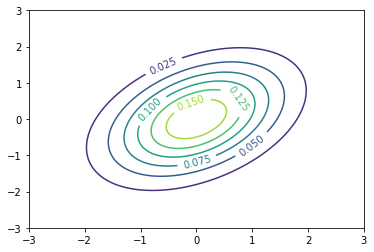

In [28]:
rho = 0.4
sigma = np.array([[1, rho], [rho, 1]])
x_1 = np.linspace(- 3, 3, 100)
x_2 = np.linspace(- 3, 3, 100)
X_1, X_2 = np.meshgrid(x_1, x_2)

C = 1 / (2 * np.pi * (1 - rho**2)**0.5)
Z =  C * np.exp(-(X_1**2 + X_2**2 - 2*rho*X_1*X_2)/(2*(1 - rho**2)))

cp = plt.contour(X_1, X_2, Z)
plt.clabel(cp)
plt.show()

Finally, note that the obtained vectorial form is independent on the dimension of $\mathbf X$. Indeed, the concept of bivariate normal distribution naturally extends to a random vector $\mathbf X \in \mathbb R^d$ if we consider the following form for the p.d.f.:

\begin{equation*}
f_\mathbf X(\mathbf x; \mathbf m, \Sigma) =
\frac{1}{\left( \sqrt{2 \pi} \right)^d \sqrt{| \Sigma |}}
\mathrm e^{-\frac{1}{2}(\mathbf x - \mathbf m)^\top \Sigma^{-1} (\mathbf x - \mathbf m)},
\end{equation*}

where $\mathbf m = [\mu_i]_d$ is a vector whose elements are the expected values of the components of $\mathbf X$ , while $\Sigma = [\sigma^2_{ij}]_{d \times d}$ is a positive definite matrix called _variance-covariance_ matrix, as its entries $\sigma^2_{ii}$ amount to the variance of the components of $\mathbf X$, while $\sigma^2_{ij}$ with $i \neq j$ measure the covariance between the $i$-th and $j$-th components.

It is relatively easy to show that $f_\mathbf X$ defined as above is a p.d.f.: first of all, let $\mathbf y = \mathbf x - \mathbf m$, so that

\begin{equation*}
f_\mathbf X(\mathbf x; \mathbf m, \Sigma) =
f_\mathbf Y(\mathbf y; \Sigma) =
\frac{1}{\left( \sqrt{2 \pi} \right)^d \sqrt{| \Sigma |}}
\mathrm e^{-\frac{1}{2} \mathbf y^\top \Sigma^{-1} \mathbf y}.
\end{equation*}

Now, $\Sigma^{-1}$ is definite positive, as well as $\Sigma$. Thus $\Sigma^{-1} = V^\top D V$, with
- $V$ being an orthonormal matrix containing the eigenvectors of $\Sigma^{-1}$, and
- $D$ being a diagonal matrix whose non-null entries are the eigenvectors of $\Sigma^{-1}$, which we will denote as $\frac{1}{\sigma'^2_{ii}}$. Noting that

\begin{equation*}
\mathbf y^\top \Sigma^{-1} \mathbf y =
\mathbf y^\top V^\top D V \mathbf y =
(V \mathbf y)^\top D (V \mathbf y),
\end{equation*}

and letting $\mathbf y' = V \mathbf y$, we have


\begin{equation*}
f_\mathbf Y(\mathbf y; \Sigma) = f_\mathbf Y'(\mathbf y'; D) =
\frac{1}{\sqrt{(2 \pi)^d \prod_{i=1}^d \sigma'^2_{ii}}}
\mathrm e^{-\frac{1}{2} \mathbf y'^\top D \mathbf y'}
\end{equation*}

because the determinant of $\Sigma$ equals the product of its eigenvalues, and the latter are the inverse of their omologues for $\Sigma^{-1}$.


Finally, $\mathbf y'^\top D \mathbf y' = \sum_i \sigma_{ii}'^2 y_i'^2$, and thus

\begin{equation*}
f_\mathbf Y'(\mathbf y'; D) =
\prod_{i=1}^d \frac{1}{\sqrt{2\pi} \sigma_{ii}'}
\mathrm e^{-\frac{y_i'^2}{2 \sigma_{ii}'^2}} =
\prod_{i=1}^d f_{Y_i}(y_i; \sigma_{ii}'),
\end{equation*}

that is the joint p.d.f. is equal to the product of $d$ univariate gaussian densities $Y_i, i = 1, \dots, d$ with null mean and standard deviation equal to $\sigma_{ii}'$. This means that the integral over $\mathbb R^d$ of the former is equal to the product of the integrals over $\mathbb R$ of the latter, and thus equals to 1.

In other words, the eigenvector matrix $V$ performs a rotation of the reference system so that the components of $\mathbf X$ become independent.